In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\marxe\OneDrive\Área de Trabalho\170 Projetos\6. Projeto de ciência de dados em séries temporais\dados.csv", index_col= "Date", parse_dates=True)
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


index_col (Coluna de Indice) Este argumento é usado para especificar qual coluna do conjuto de dados deve ser usada como indice do DataFrame

parse_dates (Analisar Datas) Este argumento controla se o Pandas tentara automaticamente analisar as datas no conjunto de dados, quando parse_datas=True, o Pandas tenta inferir automaticamente as colunas que contem datas e converte essas colunas para o formato de data do Pandas

In [2]:
data.coluna = ["West", "East"]
data["Total"] = data["West"] + data["East"]
data.head()

C:\Users\marxe\AppData\Local\Temp\ipykernel_12604\4104669196.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.coluna = ["West", "East"]


,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [3]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


data.dropna() é um metodo do Pandas que remove as linhas que contem valores nulos (NaN) do DataFrame. Portanto data.dropna() cria um novo DataFrame excluindo todas as linhas que tem pelo menos um valor nulo

describe() é um metodo do Pandas que gera estatísticas descritivas para cada coluna do DataFrame, excluindo valores nulos. As estatisticas descritivas incluem contagem, média, desvio padrão, min, 25 percentil, mediana 50 percentil, 75 percentil e max, ferramenta muito poderosa.

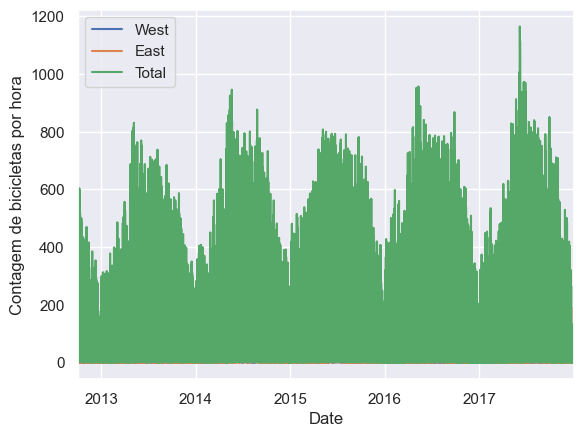

In [4]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Contagem de bicicletas por hora")
plt.show()

As aproximadamente 25.000 amostras horárias são densas demais para que possamos entender. Podemos obter mais informações reamostrando os dados para uma grade mais grosseira. Vamos fazer uma nova amostra por semana:

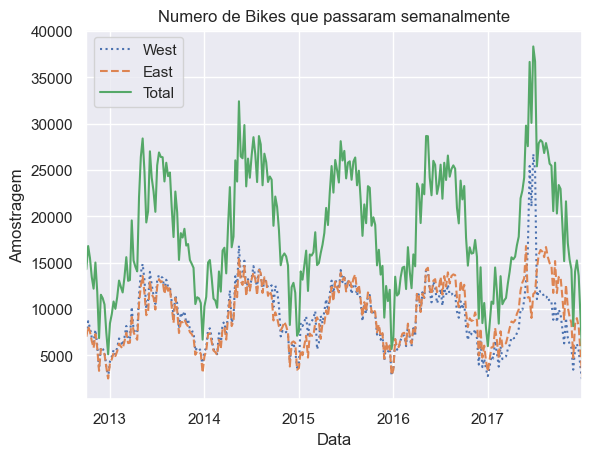

In [15]:
semana = data.resample("W").sum()
semana.plot(style=[":","--","-"])
plt.ylabel("Amostragem")
plt.xlabel("Data")
plt.title("Numero de Bikes que passaram semanalmente")
plt.show()

Explicação: 

semana = data.resample("W").sum() >>> Nesta linha de código, está sendo utilizado o metodo resample da biblioteca pandas para reamostrar os dados de uma serie temporal (Data) com uma frequencia semanal W. Em seguida os valores para semana são somados, essa é uma operação comum ao lidar com dados de series temporais para agraga-los em uma frequencia diferente


semana.plot(style=[":","--","-"]) >>> Aqui o método plot é utilizado para criar um gráfico de serie temporal resultante. O parametro style define o estilo de linha para cada serie de dados. 


OBS> O código utiliza o método resample("W") para reamostrar os dados com uma frequência semanal. O argumento "W" é uma string que representa a frequência desejada, onde "W" significa semana. O pandas possui uma série de códigos de frequência que podem ser usados com o método resample, e "W" é específico para semanas.

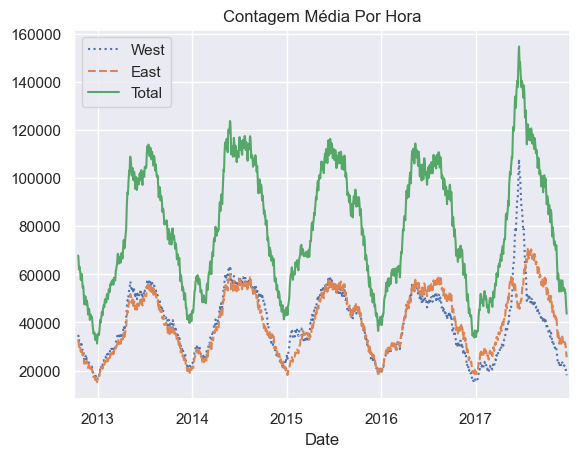

In [16]:
dia = data.resample("D").sum()
dia.rolling(30, center=True).sum().plot(style=[":","--","-"])
plt.title("Contagem Média Por Hora")
plt.show()

Explicação >>>

daily = data.resample("D").sum(), nesta linha você está reamostrando os dados temporais para a frequencia diaria ("D") e, em seguida, somando os valores para cada dia. Isso cria uma nova serie temporal onde os valores representam a soma diaria dos dados originais.

daily.rolling(30, center=True).sum().plot(style=[":","--","-"]) >>> Aqui está sendo aplicado a média movel (rolling mean) a serie temporal diaria. A função rolling (30, center=True) cria uma janela de 30 dias que se move ao longo da série. O center=True especifica que a media movel deve ser centrada na janela, ou seja, ela será calculada considerando igualmente os dias antes e depois do ponto atual.

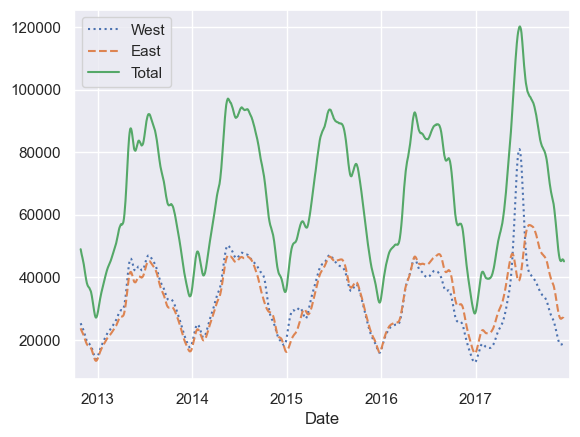

In [17]:
dia.rolling(50, center=True,
            win_type="gaussian").sum(std=10).plot(style=[":","--","-"])
plt.show()

dia.rolling(50, center=True, win_type="gaussian") Aqui nós estamos criando uma aplicação onde se mostra a média movel utilizando uma janela de 50 dias (rolling 50) nos dados da serie temporal dia. A opção center=True especifica que a janela deve ser centrada, e win_type="gaussian" indica que está sendo uma janela gaussiana ponderada.

Após calcular a média movel com a janela gaussiana, nós inserimos o argumento sum(std=10 ) que soma os valores dentro desa janela, e std=10 indica o desvio padrão (spread) da janela gaussiana

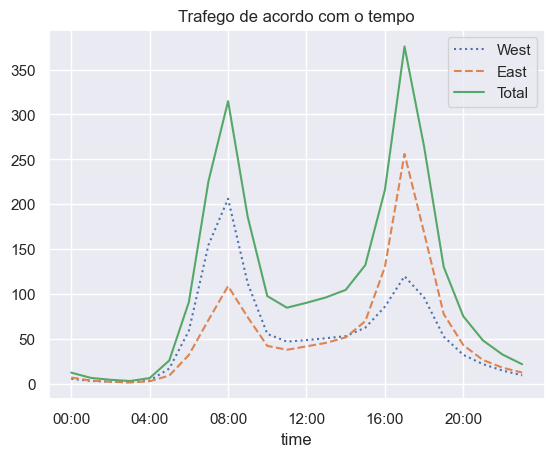

In [18]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[":","--","-"])
plt.title("Trafego de acordo com o tempo")
plt.show()



by_time = data.groupby(data.index.time).mean() >>> Aqui estamos agrupando os dados pelo componente de tempo do indice. Isso significa que os dados estão sendo agrupados por hora do dia, mean() apos o agrupamento, você está calculando a media para cada grupo de horas, portanto by_time agora contem a media dos valores para cada hora do dia.

hourly_ticks = 4 * 60 * 60 * np.arange(6) >>> Aqui esttamos criando uma lista de posições de ticks para o eixo X. O objettivo é ter ticks a cada 4 horas ao longo do dia, np.arange(6) cria um array de valores 0 a 5, multiplicando por 5 * 60 * 60 (que é o numero de segundos em 4 horas), você obtem a posição dos ticks para cada 4 horas